# Assignment 8 Analysis
In this assignment, I walk through the data performing various analysis

In [33]:
# Import necessary libraries
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
import csv
from mpl_toolkits.mplot3d import Axes3D

In [34]:
# Read in the data
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

# Format the data sorted by physical location on slide
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

In [3]:
# Synapse data (as in rows from last code block) considering only unmasked synapses
unmaskedSynapses = ([r[-1] for r in rows if r[-2] != 0])

# Synapse data considering only unmasked synapses with non-zero density values
unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0])

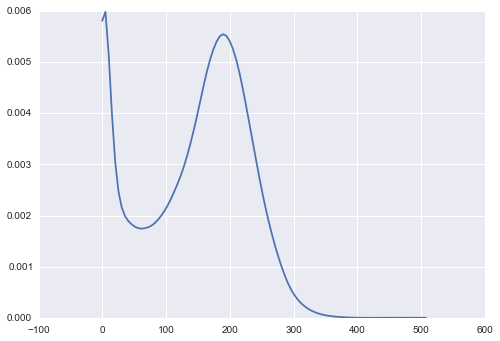

In [5]:
unmaskedSynapses = np.asarray(unmaskedSynapses)
sns.kdeplot(unmaskedSynapses)

,xy
0,1
1,1
2,2
3,1
4,1
5,1
6,1
7,1
8,1
9,3


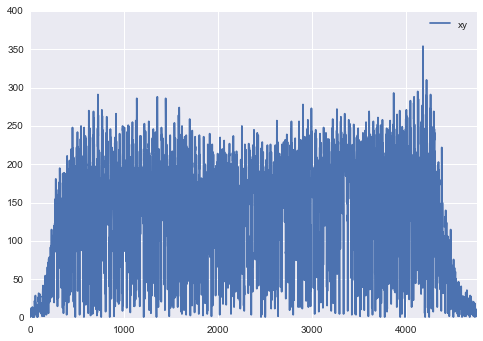

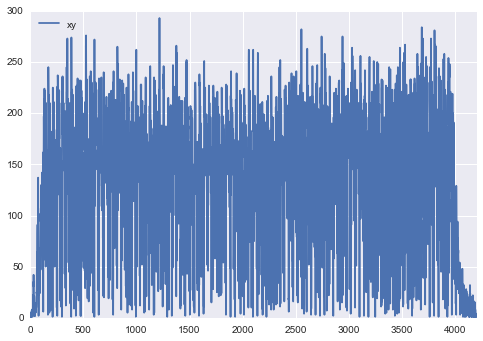

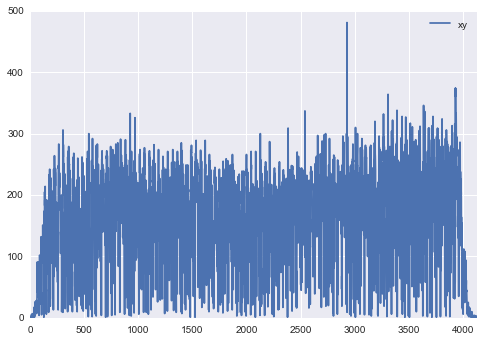

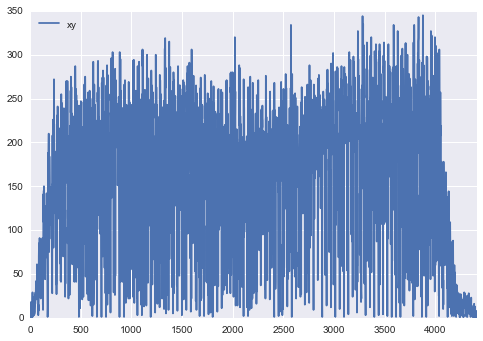

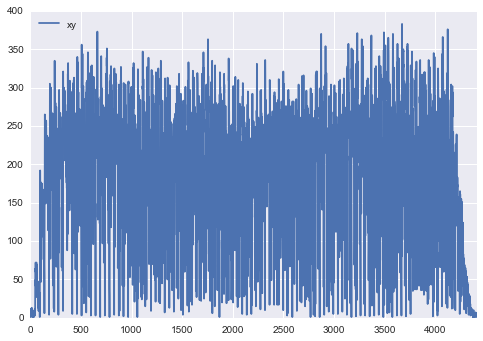

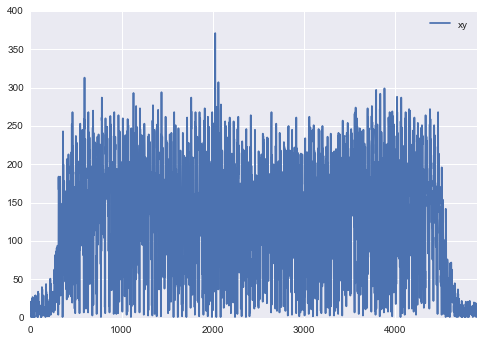

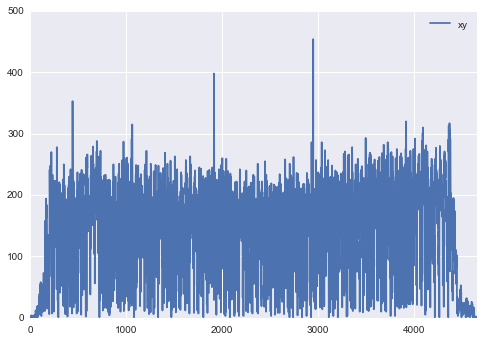

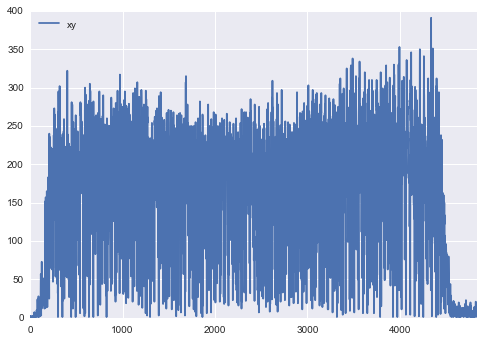

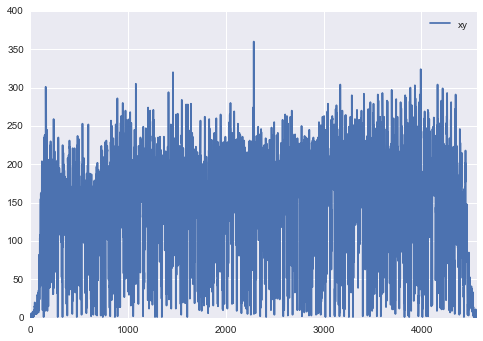

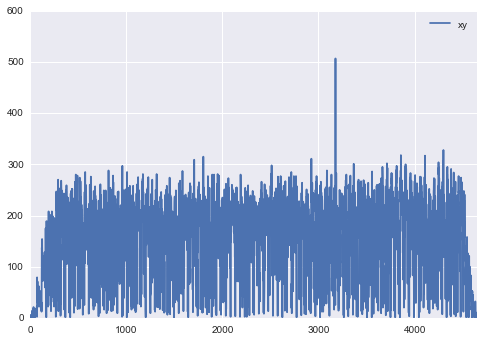

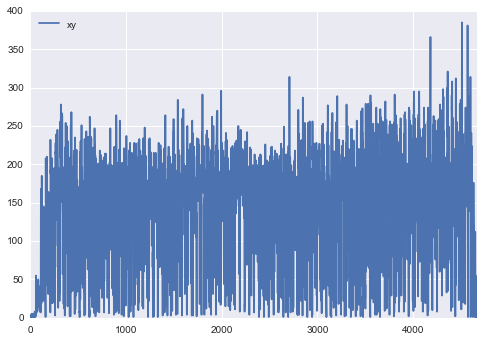

In [6]:
count = 0
for i in sorted_z:
    unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0 if r[2] == i])
    # convert to pandas dataframe
    df = pd.DataFrame(unmaskedSynapsesNoZero, columns=['xy'])
    df.plot()
    count = count + 1
    
df
    
#     syn_den = sns.load_dataset(df)

/Library/Python/2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


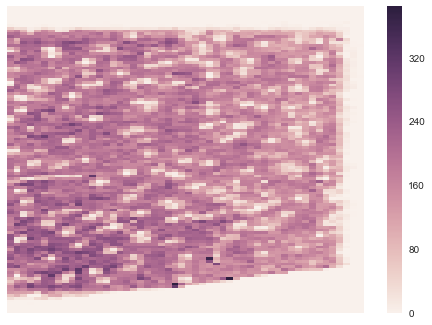

In [7]:
real_volume = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    real_volume[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

count = 0
for i in sorted_z:
    df = pd.DataFrame(real_volume[:,:,count])
#     print real_volume[:,:,count]
#     ax = sns.heatmap(df)
    count = count + 1
    
ax = sns.heatmap(df, yticklabels=False, xticklabels=False)
    
#     syn_den = sns.load_dataset(df)
    

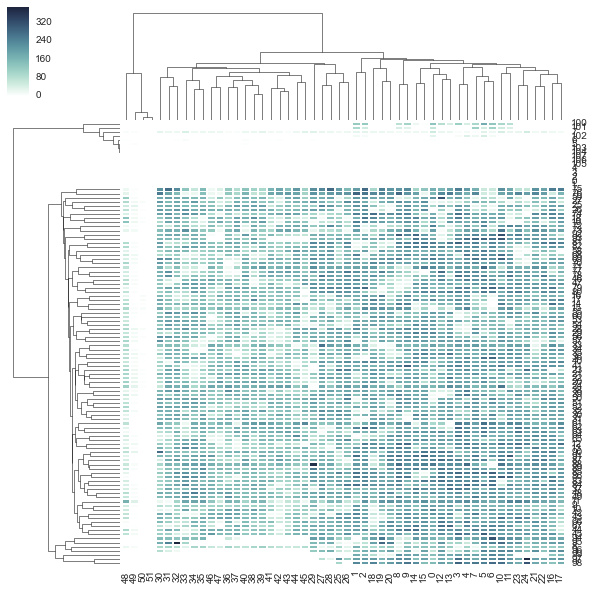

In [8]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(df, cmap=cmap, linewidths=.5)

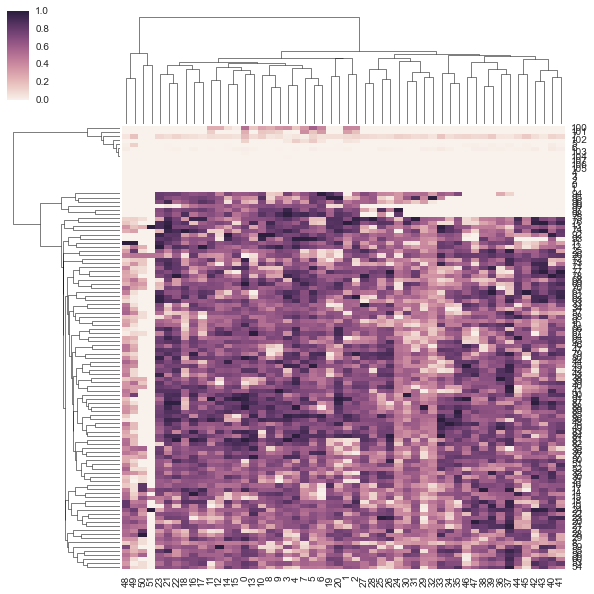

In [9]:
# standardize data across all columns
g = sns.clustermap(df, standard_scale=1)

## Analysis using Principal Components

### PCA from single 2D Layer
Here we use a single z layer and find the principle components

In [31]:
pca = PCA(n_components=5)
pca.fit(df)
print(pca.explained_variance_ratio_)

[ 0.54632801  0.06806289  0.03887388  0.03446306  0.03072315]


[ 0.54632801  0.06806289  0.03887388  0.03446306  0.03072315]


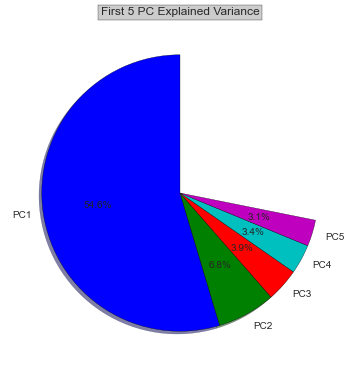

In [32]:
# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'
fracs = pca.explained_variance_ratio_
print fracs

pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

title('First 5 PC Explained Variance', bbox={'facecolor':'0.8', 'pad':5})

show()

We can see how the first five pricipal components explain variance in the 2D z-layers ("z" w.r.t. image, not brain) 

### PCA from single all three dimensions
We want to use PCA to go from 3D data --> 2D. This can help us visualize data, and will reorient our view hopefully in such a way that we can see brain layers.


In [ ]:
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

### Transforming data to PC

In [11]:
pca.transform(df)

array([[ -9.25448869e+02,   4.48443279e+01,  -8.34663860e+00,
         -5.57001271e+00,   1.50815893e+01],
       [ -9.25448869e+02,   4.48443279e+01,  -8.34663860e+00,
         -5.57001271e+00,   1.50815893e+01],
       [ -9.25448869e+02,   4.48443279e+01,  -8.34663860e+00,
         -5.57001271e+00,   1.50815893e+01],
       [ -9.25448869e+02,   4.48443279e+01,  -8.34663860e+00,
         -5.57001271e+00,   1.50815893e+01],
       [ -9.25448869e+02,   4.48443279e+01,  -8.34663860e+00,
         -5.57001271e+00,   1.50815893e+01],
       [ -9.21391320e+02,   4.83091348e+01,  -9.23692614e+00,
         -2.66280654e+00,   1.40556159e+01],
       [ -9.09954778e+02,   4.95710900e+01,  -1.02866810e+01,
         -5.38152988e+00,   1.30360782e+01],
       [ -7.60523791e+02,   4.82216920e+01,  -1.58564927e+01,
         -1.34314453e+01,   1.00308080e+01],
       [ -2.28082014e+02,  -3.31130425e+01,  -1.21926526e+01,
         -2.04733899e+01,  -3.43479327e+01],
       [ -2.39174915e+01,  -4.4978501

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,3.0,2.0,5.0,0.0,0.0
6,5.0,3.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,2.0,...,5.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0
7,55.0,28.0,33.0,9.0,14.0,36.0,21.0,7.0,16.0,21.0,...,16.0,8.0,20.0,36.0,24.0,20.0,8.0,7.0,0.0,0.0
8,138.0,168.0,93.0,20.0,103.0,162.0,125.0,19.0,27.0,146.0,...,73.0,60.0,63.0,88.0,65.0,49.0,24.0,10.0,1.0,0.0
9,197.0,208.0,160.0,98.0,189.0,176.0,162.0,168.0,190.0,177.0,...,52.0,68.0,90.0,121.0,108.0,112.0,50.0,7.0,0.0,0.0
